In [41]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [42]:
# "God"-given initialization
x_0 = 7
W = np.pi

In [43]:
tau = 17 # Assume this is known
dt = 10e-3
n = 10000 # Number of time-steps
x_values = [x_0]
# Euler's method
for i in range(n):
    x_t = x_values[-1]
    x_t1 = x_t - (dt / tau) * x_t
    x_values.append(x_t1)
x_values = np.array(x_values)

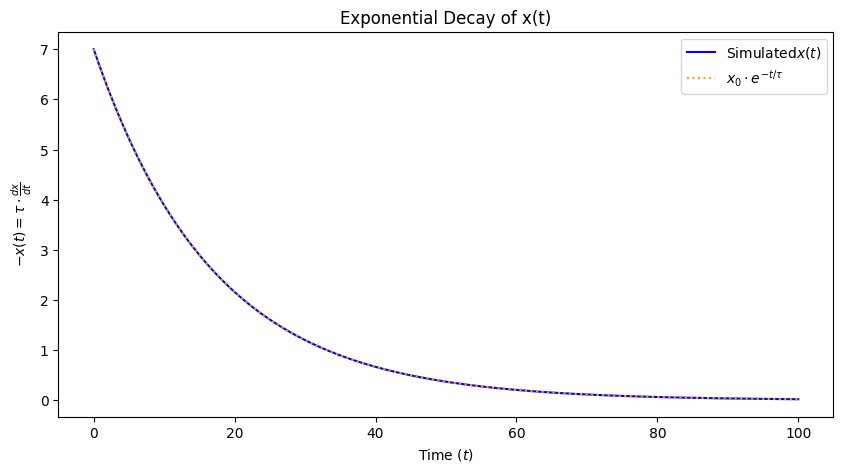

In [44]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(np.arange(n + 1) * dt, x_values, label=r'Simulated$x(t)$', color='blue')
plt.plot(np.arange(n + 1) * dt, x_0 * np.exp(-np.arange(n + 1) * dt / tau), label=r'$x_0 \cdot e^{-t/\tau}$', color='orange', linestyle=':')
plt.title('Exponential Decay of x(t)')
plt.xlabel(r'Time ($t$)')
plt.ylabel(r'$-x(t) = \tau\cdot\frac{dx}{dt}$')
plt.legend()
plt.show()

In [61]:
# "God"-given data
x_data = [x_0]
# Euler's method
for i in range(n):
    x_t = x_data[-1]
    x_t1 = x_t - (W * dt / tau) * x_t
    x_data.append(x_t1)
x_data = np.array(x_data)
x_data = torch.from_numpy(x_data)

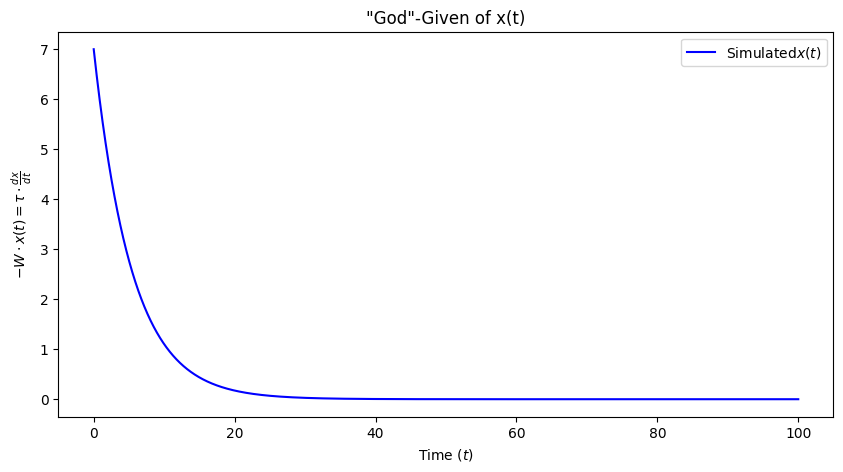

In [62]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(n + 1) * dt, x_data, label=r'Simulated$x(t)$', color='blue')
plt.title('"God"-Given of x(t)')
plt.xlabel(r'Time ($t$)')
plt.ylabel(r'$-W\cdot x(t) = \tau\cdot\frac{dx}{dt}$')
plt.legend()
plt.show()

In [105]:
x_train, W_train = torch.tensor([1.0], requires_grad=True), torch.tensor([1.0], requires_grad=True)
epochs = 500
optimizer = torch.optim.SGD([x_train, W_train], lr=0.5)
loss_fn = torch.nn.MSELoss()

In [106]:
# Training loop
for epoch in range(epochs):
    optimizer.zero_grad()
    x_pred = [x_train]
    for i in range(n):
        x_t = x_pred[-1]
        x_t1 = x_t - (W_train * dt / tau) * x_t
        x_pred.append(x_t1)
    x_pred = torch.stack(x_pred).squeeze()
    x_pred = x_pred.double()
    loss = loss_fn(x_pred, x_data)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f"Epoch = {epoch}/{epochs} | Loss = {loss}")

Epoch = 0/500 | Loss = 0.8370127272370462
Epoch = 50/500 | Loss = 0.08489954197630221
Epoch = 100/500 | Loss = 0.019438534504503394
Epoch = 150/500 | Loss = 0.005401795205121854
Epoch = 200/500 | Loss = 0.0016342661137753467
Epoch = 250/500 | Loss = 0.0005161377128491448
Epoch = 300/500 | Loss = 0.00016680360402930022
Epoch = 350/500 | Loss = 5.460135808120342e-05
Epoch = 400/500 | Loss = 1.8002984267577854e-05
Epoch = 450/500 | Loss = 5.960461591216921e-06


Trained x_0 = 6.9881, Trained W = 3.1353
Original x_0 = 7, Original W = 3.141592653589793


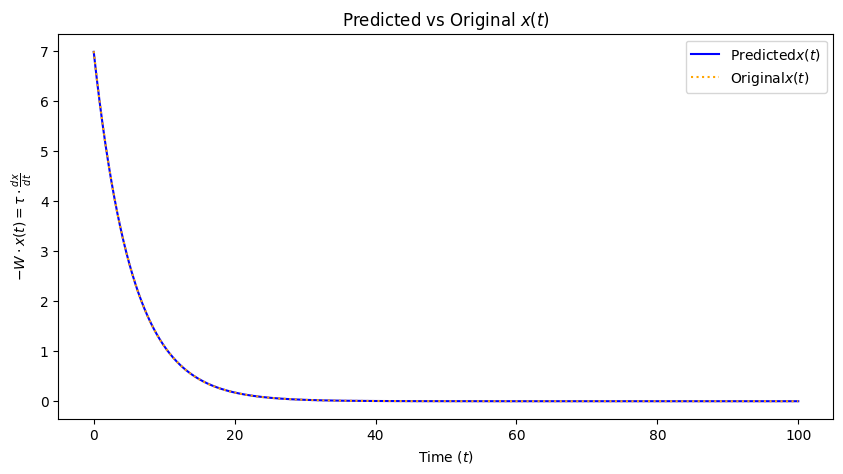

In [108]:
# Test
print(f"Trained x_0 = {x_train.item():.4f}, Trained W = {W_train.item():.4f}")
print(f"Original x_0 = {x_0}, Original W = {W}")

x_test = [x_train.item()]
for i in range(n):
    x_t = x_test[-1]
    x_t1 = x_t - (W_train.item() * dt / tau) * x_t
    x_test.append(x_t1)

plt.figure(figsize=(10, 5))
plt.plot(np.arange(n + 1) * dt, x_test, label=r'Predicted$x(t)$', color='blue')
plt.plot(np.arange(n + 1) * dt, x_data, label=r'Original$x(t)$', color='orange', linestyle=':')
plt.title(r'Predicted vs Original $x(t)$')
plt.xlabel(r'Time ($t$)')
plt.ylabel(r'$-W\cdot x(t) = \tau\cdot\frac{dx}{dt}$')
plt.legend()
plt.show()